### The following script is used to recognize handwritten digits 0 to 9

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from numpy import unique
from numpy import reshape
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.datasets import mnist
from numpy import argmax
from PIL import Image
from numpy import asarray

In [253]:
tf.random.set_seed(42)

In [254]:
hand = mnist.load_data()

In [255]:
hand[0]

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [256]:
(X_train, y_train), (X_test, y_test) = hand

In [257]:
np.set_printoptions(edgeitems=3)
np.core.arrayprint._line_width = 180000

In [258]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [259]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [260]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

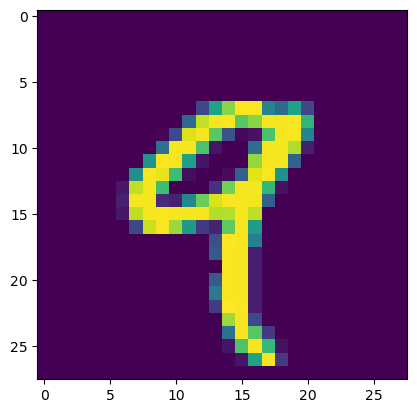

In [266]:
plt.imshow(X_train[4])

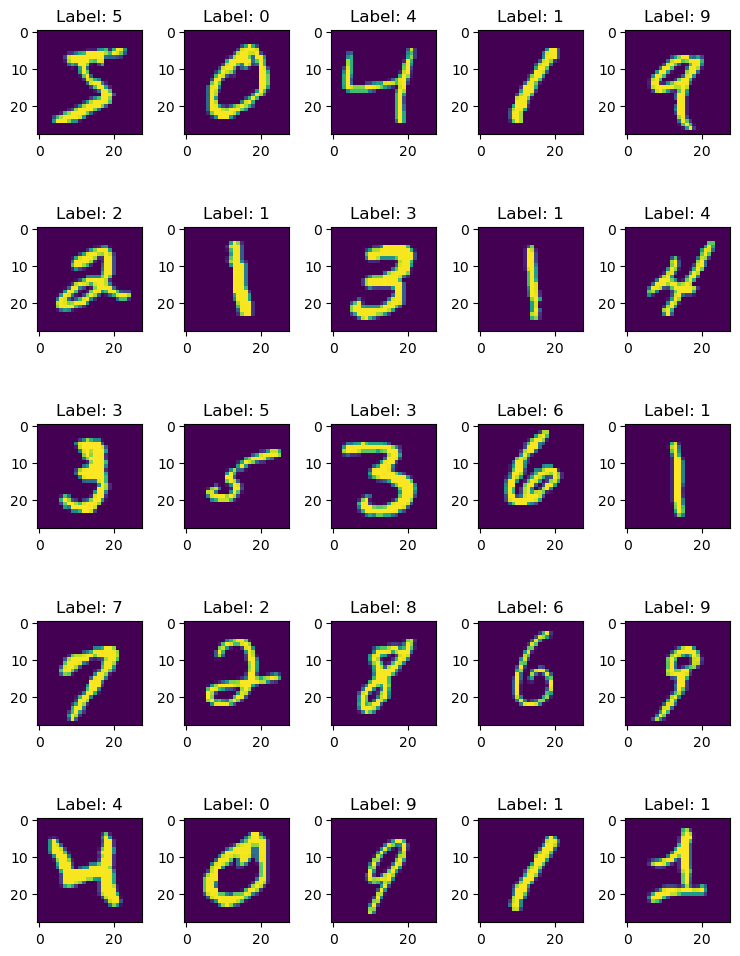

In [267]:
num = 25
images = X_train[:num]
labels = y_train[:num]

num_row = 5
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i])#, cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [269]:
# 5. Preprocess input data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [270]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [271]:
X_train /= 255
X_test /= 255

In [272]:
# 6. Preprocess class labels
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

In [273]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [274]:
for label in range(10):
    one_hot = (Y_train[label]).astype(np.int32)
    print("label: ", label, " in one-hot representation: ", one_hot)

label:  0  in one-hot representation:  [0 0 0 0 0 1 0 0 0 0]
label:  1  in one-hot representation:  [1 0 0 0 0 0 0 0 0 0]
label:  2  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]
label:  3  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  4  in one-hot representation:  [0 0 0 0 0 0 0 0 0 1]
label:  5  in one-hot representation:  [0 0 1 0 0 0 0 0 0 0]
label:  6  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  7  in one-hot representation:  [0 0 0 1 0 0 0 0 0 0]
label:  8  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  9  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]


In [275]:
epochs = 30
batch_size = 16
n_hidden = 32

#timesteps = len(X_train[0])
#input_dim = len(X_train[0][0])
#n_classes = _count_classes(Y_train)

# 7. Define model architecture
model = Sequential()
 
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
 
# 8. Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\kshifera\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [276]:
# 9. Fit model on training data
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.8697 - loss: 0.4105
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9730 - loss: 0.0924
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9790 - loss: 0.0677
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9826 - loss: 0.0551
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9851 - loss: 0.0470
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9871 - loss: 0.0421
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9882 - loss: 0.0379
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9901 - loss: 0.0331
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9905 - loss: 0.0304
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9905 - loss: 0.0294


In [277]:
# 10. Evaluate model on test data
score = model.evaluate(X_test, Y_test, verbose=2)

313/313 - 1s - 5ms/step - accuracy: 0.9923 - loss: 0.0283


In [279]:
#predict first 25 images in the test set
model.predict(X_test[:25])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([[2.90216930e-11, 2.66223310e-09, 7.53795637e-11, 3.52207929e-09,
        3.86900689e-13, 1.90448633e-12, 7.16673667e-18, 1.00000000e+00,
        6.01539027e-11, 2.44168064e-08],
       [2.93879004e-10, 1.91108640e-09, 1.00000000e+00, 1.71049514e-12,
        1.89967416e-14, 3.29012181e-17, 1.12832088e-09, 2.03210607e-14,
        1.78084598e-13, 1.51370219e-15],
       [1.14415257e-11, 9.99999523e-01, 5.55800561e-09, 2.39521215e-11,
        1.18527197e-07, 3.58239727e-09, 2.06339479e-09, 3.57137964e-07,
        8.18354806e-09, 1.99188599e-09],
       [9.99997616e-01, 2.85073187e-09, 2.15166995e-08, 3.00727065e-09,
        4.18819646e-10, 3.85064673e-08, 1.39572035e-06, 7.33880938e-08,
        6.89007663e-07, 1.03041565e-07],
       [5.32199474e-14, 1.79699831e-12, 9.27910526e-12, 1.52678419e-15,
        9.99995470e-01, 1.61339414e-10, 4.73305206e-12, 2.77340734e-10,
        1.98041095e-09, 4.50854213e-06],
       [1.56974017e-10, 9.99991059e-01, 2.29102293e-09, 5.76007610e-11,
   

In [280]:
sumarray = np.sum(model.predict(X_test[:25]), axis=1)
sumarray

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([1.        , 1.        , 1.        , 0.99999994, 1.        ,
       0.99999994, 0.9999999 , 1.        , 1.        , 0.99999994,
       0.99999994, 1.        , 1.        , 1.        , 1.        ,
       0.99999994, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ],
      dtype=float32)

In [281]:
#actual results for first 25 images in test set
y_test[:25]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4], dtype=uint8)

In [282]:
test_predictions = model.predict(X_test)
cm = confusion_matrix(y_test, np.argmax(test_predictions,axis=1))
print(cm)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
[[ 974    0    0    1    1    0    3    0    1    0]
 [   0 1132    1    0    0    1    1    0    0    0]
 [   1    1 1022    0    0    0    0    6    1    1]
 [   0    0    1 1003    0    2    0    1    2    1]
 [   0    0    0    0  973    0    1    0    2    6]
 [   1    0    0    4    0  883    1    0    1    2]
 [   3    2    0    1    2    1  948    0    1    0]
 [   0    1    3    0    0    0    0 1022    1    1]
 [   2    0    1    0    0    0    0    0  968    3]
 [   0    0    0    0    4    2    0    2    3  998]]


## Test for Handwritten Digits

In [283]:
path = r'C:\Users\kshifera\Desktop\CF_Course\Specialization\Project\Data Sets'

### Test for 9

In [284]:
img = Image.open(os.path.join(path, 'Nine.jpg'))
print(img.format)
print(img.size)
print(img.mode)

JPEG
(2848, 2786)
L


In [285]:
newsize = (28,28)
img = img.resize(newsize)
img

In [286]:
testimg = asarray(img)

In [287]:
print(testimg.shape)

(28, 28)


In [288]:
testimg = testimg.reshape(1, 28, 28, 1)

In [289]:
# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
8


In [290]:
# wrong!

### Test for 8

In [291]:
img = Image.open(os.path.join(path, 'Eight.jpg'))
print(img.format)
print(img.size)
print(img.mode)

JPEG
(2721, 2681)
L


In [292]:
newsize = (28,28)
img2 = img.resize(newsize)
img2

In [293]:
testimg = asarray(img2)

In [294]:
print(testimg.shape)

(28, 28)


In [295]:
testimg = testimg.reshape(1, 28, 28, 1)

In [296]:
# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
8


In [173]:
# correct!

### Test for 7

In [1]:
img = Image.open(os.path.join(path, 'Seven.jpg'))
print(img.format)
print(img.size)
print(img.mode)

NameError: name 'Image' is not defined

In [175]:
newsize = (28,28)
img = img.resize(newsize)
img

In [176]:
testimg = asarray(img)

In [177]:
print(testimg.shape)

(28, 28)


In [178]:
testimg = testimg.reshape(1, 28, 28, 1)

In [179]:
# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
8


In [180]:
# wrong!

### Test for 6

In [181]:
img = Image.open(os.path.join(path, 'Six.jpg'))
print(img.format)
print(img.size)
print(img.mode)

JPEG
(2474, 2079)
L


In [182]:
newsize = (28,28)
img = img.resize(newsize)
img

In [183]:
testimg = asarray(img)

In [184]:
print(testimg.shape)

(28, 28)


In [185]:
testimg = testimg.reshape(1, 28, 28, 1)

In [186]:
# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
8


### Test for 5

In [198]:
img = Image.open(os.path.join(path, 'Five.jpg'))
print(img.format)
print(img.size)
print(img.mode)

JPEG
(2743, 3108)
L


In [199]:
newsize = (28,28)
img = img.resize(newsize)
img

In [200]:
testimg = asarray(img)

In [201]:
print(testimg.shape)

(28, 28)


In [202]:
testimg = testimg.reshape(1, 28, 28, 1)

In [203]:
# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
8


In [204]:
# wrong!

### Test for 4

In [205]:
img = Image.open(os.path.join(path, 'Four.jpg'))
print(img.format)
print(img.size)
print(img.mode)

JPEG
(2673, 2727)
L


In [206]:
newsize = (28,28)
img = img.resize(newsize)
img

In [207]:
testimg = asarray(img)

In [208]:
print(testimg.shape)

(28, 28)


In [209]:
testimg = testimg.reshape(1, 28, 28, 1)

In [210]:
# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
8


### Test for 3

In [211]:
img = Image.open(os.path.join(path, 'Three.jpg'))
print(img.format)
print(img.size)
print(img.mode)

JPEG
(2709, 2475)
L


In [212]:
newsize = (28,28)
img = img.resize(newsize)
img

In [213]:
testimg = asarray(img)

In [214]:
print(testimg.shape)

(28, 28)


In [215]:
testimg = testimg.reshape(1, 28, 28, 1)

In [216]:
# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
8


### Test for 2

In [217]:
img = Image.open(os.path.join(path, 'Two.jpg'))
print(img.format)
print(img.size)
print(img.mode)

JPEG
(2795, 2795)
L


In [218]:
newsize = (28,28)
img = img.resize(newsize)
img

In [219]:
testimg = asarray(img)

In [220]:
print(testimg.shape)

(28, 28)


In [221]:
testimg = testimg.reshape(1, 28, 28, 1)

In [222]:
# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
8


### Test for 1

In [240]:
img = Image.open(os.path.join(path, 'One.jpg'))
print(img.format)
print(img.size)
print(img.mode)

JPEG
(2785, 2894)
L


In [241]:
newsize = (28,28)
img = img.resize(newsize)
img

In [242]:
testimg = asarray(img)

In [243]:
print(testimg.shape)

(28, 28)


In [244]:
testimg = testimg.reshape(1, 28, 28, 1)

In [245]:
# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
8


### Test for 0

In [246]:
img = Image.open(os.path.join(path, 'Zero.jpg'))
print(img.format)
print(img.size)
print(img.mode)

JPEG
(2839, 1985)
L


In [247]:
newsize = (28,28)
img = img.resize(newsize)
img

In [248]:
testimg = asarray(img)

In [249]:
print(testimg.shape)

(28, 28)


In [250]:
testimg = testimg.reshape(1, 28, 28, 1)

In [251]:
# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
8
